In [4]:
import theano 
import numpy as np
from theano import tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [14]:

trX = np.linspace(-1, 1, 101)
trY = 0.5 * trX + 0.8 + np.random.randn(*trX.shape) * 0.33

X = T.scalar()
Y = T.scalar()

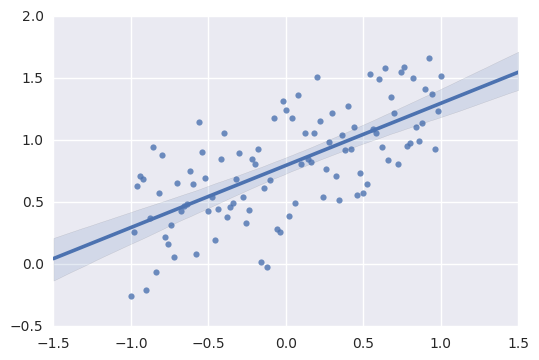

In [15]:
sns.regplot(x=trX, y=trY)

In [16]:

def model(X, w, b):
    return X * w + b


w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
b = theano.shared(np.asarray(0., dtype=theano.config.floatX))

y = model(X, w, b)

cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost=cost, wrt=w)
g_b = T.grad(cost=cost, wrt=b)
updates = [[w, w - gradient * 0.01], [b , b - g_b * 0.01]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

for i in range(100):
    for x, y in zip(trX, trY):
        train(x, y)
        
print w.get_value() #something around 2
print b.get_value() #something around 2


0.513578985832
0.797815423836


### class oriented implement

In [ ]:
from .layer import LogisticRegress